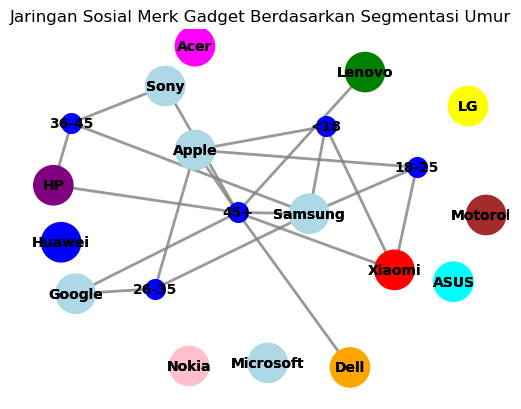

Pengaruh Merek Gadget berdasarkan Degree Centrality:
Samsung :  0.2631578947368421
Apple :  0.21052631578947367
Xiaomi :  0.15789473684210525
Google :  0.10526315789473684
Sony :  0.10526315789473684
HP :  0.10526315789473684
Lenovo :  0.05263157894736842
Dell :  0.05263157894736842
Microsoft :  0.0
Huawei :  0.0
ASUS :  0.0
Acer :  0.0
LG :  0.0
Nokia :  0.0
Motorola :  0.0
Pengaruh Merek Gadget berdasarkan Betweenness Centrality:
Samsung :  0.08379281537176274
Apple :  0.04129768866610972
Xiaomi :  0.02183235867446394
Google :  0.009607351712614872
Sony :  0.0094541910331384
HP :  0.0094541910331384
Microsoft :  0.0
Huawei :  0.0
Lenovo :  0.0
Dell :  0.0
ASUS :  0.0
Acer :  0.0
LG :  0.0
Nokia :  0.0
Motorola :  0.0


In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Buat graf kosong
G = nx.Graph()

# Tambahkan simpul (node) segmentasi umur
age_segments = ["<18", "18-25", "26-35", "36-45", "45+"]

# Tambahkan simpul (node) merek gadget
gadget_brands = [
    "Apple", "Samsung", "Google", "Sony", "Microsoft",
    "Xiaomi", "Huawei", "Lenovo", "HP", "Dell",
    "ASUS", "Acer", "LG", "Nokia", "Motorola"
]

# Tambahkan tepi (edge) untuk menggambarkan hubungan antara segmentasi umur dan merek gadget
interactions = [
    ("<18", "Apple"), ("<18", "Samsung"), ("<18", "Xiaomi"),
    ("18-25", "Apple"), ("18-25", "Samsung"), ("18-25", "Xiaomi"),
    ("26-35", "Apple"), ("26-35", "Samsung"), ("26-35", "Google"),
    ("36-45", "Samsung"), ("36-45", "Sony"), ("36-45", "HP"),
    ("45+", "Apple"), ("45+", "Samsung"), ("45+", "Google"),
    ("45+", "Sony"), ("45+", "Xiaomi"), ("45+", "Lenovo"),
    ("45+", "HP"), ("45+", "Dell")
]

# Tambahkan simpul dan tepi ke dalam graf
G.add_nodes_from(age_segments, node_type="age_segment")
G.add_nodes_from(gadget_brands, node_type="gadget_brand")
G.add_edges_from(interactions)

# Visualisasikan jaringan sosial
pos = nx.spring_layout(G, k=1.5, seed=42)

# Atur warna berdasarkan merek gadget
brand_colors = {
    "Apple": "red",
    "Samsung": "blue",
    "Google": "green",
    "Sony": "purple",
    "Microsoft": "orange",
    "Xiaomi": "cyan",
    "Huawei": "magenta",
    "Lenovo": "yellow",
    "HP": "pink",
    "Dell": "brown",
    "ASUS": "lime",
    "Acer": "teal",
    "LG": "olive",
    "Nokia": "gold",
    "Motorola": "gray"
}

node_colors = []
for node, attr in G.nodes(data=True):
    if attr["node_type"] == "gadget_brand" and node in brand_colors:
        node_colors.append(brand_colors[node])
    else:
        node_colors.append("lightblue")

nx.draw_networkx_nodes(G, pos=pos, nodelist=gadget_brands, node_color=node_colors[:len(gadget_brands)], node_size=800)
nx.draw_networkx_nodes(G, pos=pos, nodelist=age_segments, node_color="blue", node_size=200)
nx.draw_networkx_edges(G, pos=pos, width=2, alpha=0.8, edge_color="gray")
nx.draw_networkx_labels(G, pos=pos, font_size=10, font_color="black", font_weight="bold")

# Atur label simpul berdasarkan merek gadget
brand_labels = {node: node for node, attr in G.nodes(data=True) if attr["node_type"] == "gadget_brand"}
nx.draw_networkx_labels(G, pos=pos, labels=brand_labels, font_size=10, font_color="black", font_weight="bold")

plt.axis("off")
plt.title("Jaringan Sosial Merk Gadget Berdasarkan Segmentasi Umur")
plt.show()

# Analisis pengaruh merek gadget menggunakan degree centrality
degree_centrality = nx.degree_centrality(G)
brand_degree_centrality = {node: centrality for node, centrality in degree_centrality.items() if node in gadget_brands}
sorted_brands_degree = sorted(brand_degree_centrality.items(), key=lambda x: x[1], reverse=True)

print("Pengaruh Merek Gadget berdasarkan Degree Centrality:")
for brand, centrality in sorted_brands_degree:
    print(brand, ": ", centrality)

# Analisis pengaruh merek gadget menggunakan betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
brand_betweenness_centrality = {node: centrality for node, centrality in betweenness_centrality.items() if node in gadget_brands}
sorted_brands_betweenness = sorted(brand_betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

print("Pengaruh Merek Gadget berdasarkan Betweenness Centrality:")
for brand, centrality in sorted_brands_betweenness:
    print(brand, ": ", centrality)


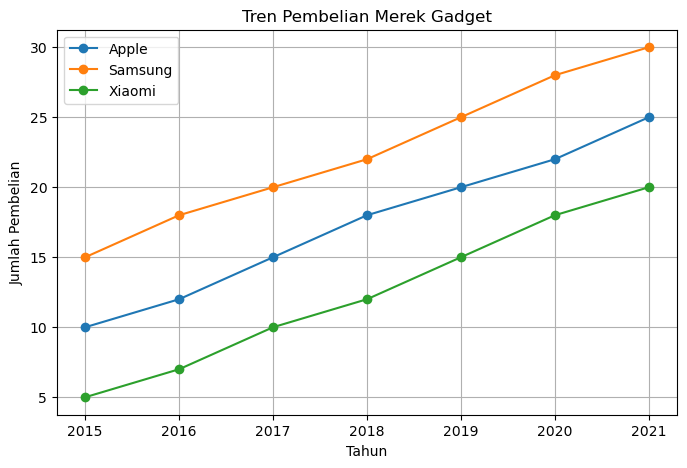

Prediksi Jumlah Pembelian Merek Gadget:
          Apple    Samsung     Xiaomi
2022  27.428571  32.571429  22.714286
2023  29.928571  35.071429  25.285714
2024  32.428571  37.571429  27.857143
2025  34.928571  40.071429  30.428571


C:\Users\rezaprakosta\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\rezaprakosta\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\rezaprakosta\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data historis pembelian merek gadget
data = {
    'Tahun': [2015, 2016, 2017, 2018, 2019, 2020, 2021],
    'Apple': [10, 12, 15, 18, 20, 22, 25],
    'Samsung': [15, 18, 20, 22, 25, 28, 30],
    'Xiaomi': [5, 7, 10, 12, 15, 18, 20]
}

df = pd.DataFrame(data)

# Analisis tren
plt.figure(figsize=(8, 5))
plt.plot(df['Tahun'], df['Apple'], marker='o', label='Apple')
plt.plot(df['Tahun'], df['Samsung'], marker='o', label='Samsung')
plt.plot(df['Tahun'], df['Xiaomi'], marker='o', label='Xiaomi')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pembelian')
plt.title('Tren Pembelian Merek Gadget')
plt.legend()
plt.grid(True)
plt.show()

# Prediksi jumlah pembelian di masa depan
future_years = np.arange(2022, 2026).reshape(-1, 1)

model = LinearRegression()
predictions = {}

for brand in ['Apple', 'Samsung', 'Xiaomi']:
    model.fit(df[['Tahun']], df[brand])
    future_predictions = model.predict(future_years)
    predictions[brand] = future_predictions

# Hasil prediksi
pred_df = pd.DataFrame(predictions, index=np.arange(2022, 2026))
print("Prediksi Jumlah Pembelian Merek Gadget:")
print(pred_df)


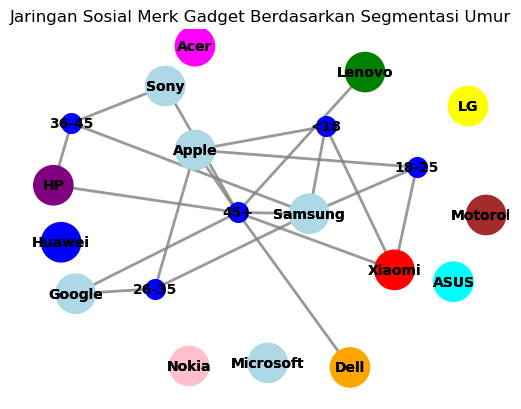

Pengaruh Merek Gadget berdasarkan Degree Centrality:
Samsung :  0.2631578947368421
Apple :  0.21052631578947367
Xiaomi :  0.15789473684210525
Google :  0.10526315789473684
Sony :  0.10526315789473684
HP :  0.10526315789473684
Lenovo :  0.05263157894736842
Dell :  0.05263157894736842
Microsoft :  0.0
Huawei :  0.0
ASUS :  0.0
Acer :  0.0
LG :  0.0
Nokia :  0.0
Motorola :  0.0
Pengaruh Merek Gadget berdasarkan Betweenness Centrality:
Samsung :  0.08379281537176274
Apple :  0.04129768866610972
Xiaomi :  0.02183235867446394
Google :  0.009607351712614872
Sony :  0.0094541910331384
HP :  0.0094541910331384
Microsoft :  0.0
Huawei :  0.0
Lenovo :  0.0
Dell :  0.0
ASUS :  0.0
Acer :  0.0
LG :  0.0
Nokia :  0.0
Motorola :  0.0
Perilaku Pembelian Merk Gadget:
Merek: Apple
Segmentasi Umur: <18 - Jumlah Pembelian: 5
Segmentasi Umur: 18-25 - Jumlah Pembelian: 12
Segmentasi Umur: 26-35 - Jumlah Pembelian: 8
Segmentasi Umur: 36-45 - Jumlah Pembelian: 3
Segmentasi Umur: 45+ - Jumlah Pembelian: 2
Mere

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# Buat graf kosong
G = nx.Graph()

# Tambahkan simpul (node) segmentasi umur
age_segments = ["<18", "18-25", "26-35", "36-45", "45+"]

# Tambahkan simpul (node) merek gadget
gadget_brands = [
    "Apple", "Samsung", "Google", "Sony", "Microsoft",
    "Xiaomi", "Huawei", "Lenovo", "HP", "Dell",
    "ASUS", "Acer", "LG", "Nokia", "Motorola"
]

# Tambahkan tepi (edge) untuk menggambarkan hubungan antara segmentasi umur dan merek gadget
interactions = [
    ("<18", "Apple"), ("<18", "Samsung"), ("<18", "Xiaomi"),
    ("18-25", "Apple"), ("18-25", "Samsung"), ("18-25", "Xiaomi"),
    ("26-35", "Apple"), ("26-35", "Samsung"), ("26-35", "Google"),
    ("36-45", "Samsung"), ("36-45", "Sony"), ("36-45", "HP"),
    ("45+", "Apple"), ("45+", "Samsung"), ("45+", "Google"),
    ("45+", "Sony"), ("45+", "Xiaomi"), ("45+", "Lenovo"),
    ("45+", "HP"), ("45+", "Dell")
]

# Tambahkan simpul dan tepi ke dalam graf
G.add_nodes_from(age_segments, node_type="age_segment")
G.add_nodes_from(gadget_brands, node_type="gadget_brand")
G.add_edges_from(interactions)

# Simulasikan data pembelian merk gadget
brand_purchases = {
    "Apple": {"<18": 5, "18-25": 12, "26-35": 8, "36-45": 3, "45+": 2},
    "Samsung": {"<18": 8, "18-25": 15, "26-35": 10, "36-45": 4, "45+": 3},
    "Google": {"<18": 2, "18-25": 5, "26-35": 4, "36-45": 2, "45+": 1},
    "Sony": {"<18": 1, "18-25": 4, "26-35": 3, "36-45": 2, "45+": 1},
    "Microsoft": {"<18": 0, "18-25": 1, "26-35": 1, "36-45": 0, "45+": 0},
    "Xiaomi": {"<18": 3, "18-25": 7, "26-35": 5, "36-45": 2, "45+": 1},
    "Huawei": {"<18": 1, "18-25": 3, "26-35": 2, "36-45": 1, "45+": 0},
    "Lenovo": {"<18": 1, "18-25": 2, "26-35": 2, "36-45": 1, "45+": 1},
    "HP": {"<18": 1, "18-25": 3, "26-35": 2, "36-45": 1, "45+": 1},
    "Dell": {"<18": 0, "18-25": 2, "26-35": 1, "36-45": 1, "45+": 1},
    "ASUS": {"<18": 0, "18-25": 1, "26-35": 1, "36-45": 0, "45+": 0},
    "Acer": {"<18": 0, "18-25": 1, "26-35": 1, "36-45": 0, "45+": 0},
    "LG": {"<18": 0, "18-25": 1, "26-35": 0, "36-45": 0, "45+": 0},
    "Nokia": {"<18": 0, "18-25": 1, "26-35": 0, "36-45": 0, "45+": 0},
    "Motorola": {"<18": 0, "18-25": 1, "26-35": 0, "36-45": 0, "45+": 0},
}

# Visualisasikan jaringan sosial
pos = nx.spring_layout(G, k=1.5, seed=42)

# Atur warna berdasarkan merek gadget
brand_colors = {
    "Apple": "red",
    "Samsung": "blue",
    "Google": "green",
    "Sony": "purple",
    "Microsoft": "orange",
    "Xiaomi": "cyan",
    "Huawei": "magenta",
    "Lenovo": "yellow",
    "HP": "pink",
    "Dell": "brown",
    "ASUS": "lime",
    "Acer": "teal",
    "LG": "olive",
    "Nokia": "gold",
    "Motorola": "gray"
}

node_colors = []
for node, attr in G.nodes(data=True):
    if attr["node_type"] == "gadget_brand" and node in brand_colors:
        node_colors.append(brand_colors[node])
    else:
        node_colors.append("lightblue")

nx.draw_networkx_nodes(G, pos=pos, nodelist=gadget_brands, node_color=node_colors[:len(gadget_brands)], node_size=800)
nx.draw_networkx_nodes(G, pos=pos, nodelist=age_segments, node_color="blue", node_size=200)
nx.draw_networkx_edges(G, pos=pos, width=2, alpha=0.8, edge_color="gray")
nx.draw_networkx_labels(G, pos=pos, font_size=10, font_color="black", font_weight="bold")

# Atur label simpul berdasarkan merek gadget
brand_labels = {node: node for node, attr in G.nodes(data=True) if attr["node_type"] == "gadget_brand"}
nx.draw_networkx_labels(G, pos=pos, labels=brand_labels, font_size=10, font_color="black", font_weight="bold")

plt.axis("off")
plt.title("Jaringan Sosial Merk Gadget Berdasarkan Segmentasi Umur")
plt.show()

# Analisis pengaruh merek gadget menggunakan degree centrality
degree_centrality = nx.degree_centrality(G)
brand_degree_centrality = {node: centrality for node, centrality in degree_centrality.items() if node in gadget_brands}
sorted_brands_degree = sorted(brand_degree_centrality.items(), key=lambda x: x[1], reverse=True)

print("Pengaruh Merek Gadget berdasarkan Degree Centrality:")
for brand, centrality in sorted_brands_degree:
    print(brand, ": ", centrality)

# Analisis pengaruh merek gadget menggunakan betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
brand_betweenness_centrality = {node: centrality for node, centrality in betweenness_centrality.items() if node in gadget_brands}
sorted_brands_betweenness = sorted(brand_betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

print("Pengaruh Merek Gadget berdasarkan Betweenness Centrality:")
for brand, centrality in sorted_brands_betweenness:
    print(brand, ": ", centrality)

# Analisis perilaku pembelian merk gadget
print("Perilaku Pembelian Merk Gadget:")
for brand, purchases in brand_purchases.items():
    print("Merek:", brand)
    for age_segment, count in purchases.items():
        print("Segmentasi Umur:", age_segment, "- Jumlah Pembelian:", count)


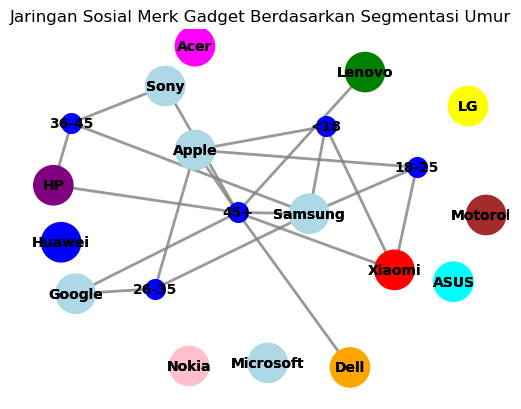

Pengaruh Merek Gadget berdasarkan Degree Centrality:
Samsung :  0.2631578947368421
Apple :  0.21052631578947367
Xiaomi :  0.15789473684210525
Google :  0.10526315789473684
Sony :  0.10526315789473684
HP :  0.10526315789473684
Lenovo :  0.05263157894736842
Dell :  0.05263157894736842
Microsoft :  0.0
Huawei :  0.0
ASUS :  0.0
Acer :  0.0
LG :  0.0
Nokia :  0.0
Motorola :  0.0
Pengaruh Merek Gadget berdasarkan Betweenness Centrality:
Samsung :  0.08379281537176274
Apple :  0.04129768866610972
Xiaomi :  0.02183235867446394
Google :  0.009607351712614872
Sony :  0.0094541910331384
HP :  0.0094541910331384
Microsoft :  0.0
Huawei :  0.0
Lenovo :  0.0
Dell :  0.0
ASUS :  0.0
Acer :  0.0
LG :  0.0
Nokia :  0.0
Motorola :  0.0
Perilaku Pembelian Merk Gadget:
Merek: Apple
Segmentasi Umur: <18 - Jumlah Pembelian: 5
Segmentasi Umur: 18-25 - Jumlah Pembelian: 12
Segmentasi Umur: 26-35 - Jumlah Pembelian: 8
Segmentasi Umur: 36-45 - Jumlah Pembelian: 3
Segmentasi Umur: 45+ - Jumlah Pembelian: 2
Mere

KeyError: '2021'

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

# Buat graf kosong
G = nx.Graph()

# Tambahkan simpul (node) segmentasi umur
age_segments = ["<18", "18-25", "26-35", "36-45", "45+"]

# Tambahkan simpul (node) merek gadget
gadget_brands = [
    "Apple", "Samsung", "Google", "Sony", "Microsoft",
    "Xiaomi", "Huawei", "Lenovo", "HP", "Dell",
    "ASUS", "Acer", "LG", "Nokia", "Motorola"
]

# Tambahkan tepi (edge) untuk menggambarkan hubungan antara segmentasi umur dan merek gadget
interactions = [
    ("<18", "Apple"), ("<18", "Samsung"), ("<18", "Xiaomi"),
    ("18-25", "Apple"), ("18-25", "Samsung"), ("18-25", "Xiaomi"),
    ("26-35", "Apple"), ("26-35", "Samsung"), ("26-35", "Google"),
    ("36-45", "Samsung"), ("36-45", "Sony"), ("36-45", "HP"),
    ("45+", "Apple"), ("45+", "Samsung"), ("45+", "Google"),
    ("45+", "Sony"), ("45+", "Xiaomi"), ("45+", "Lenovo"),
    ("45+", "HP"), ("45+", "Dell")
]

# Tambahkan simpul dan tepi ke dalam graf
G.add_nodes_from(age_segments, node_type="age_segment")
G.add_nodes_from(gadget_brands, node_type="gadget_brand")
G.add_edges_from(interactions)

# Simulasikan data pembelian merk gadget selama 2 tahun (2021 dan 2022)
brand_purchases = {
    "Apple": {"<18": 5, "18-25": 12, "26-35": 8, "36-45": 3, "45+": 2},
    "Samsung": {"<18": 8, "18-25": 15, "26-35": 10, "36-45": 4, "45+": 3},
    "Google": {"<18": 2, "18-25": 5, "26-35": 4, "36-45": 2, "45+": 1},
    "Sony": {"<18": 1, "18-25": 4, "26-35": 3, "36-45": 2, "45+": 1},
    "Microsoft": {"<18": 0, "18-25": 1, "26-35": 1, "36-45": 0, "45+": 0},
    "Xiaomi": {"<18": 3, "18-25": 7, "26-35": 5, "36-45": 2, "45+": 1},
    "Huawei": {"<18": 1, "18-25": 3, "26-35": 2, "36-45": 1, "45+": 0},
    "Lenovo": {"<18": 1, "18-25": 2, "26-35": 2, "36-45": 1, "45+": 1},
    "HP": {"<18": 1, "18-25": 3, "26-35": 2, "36-45": 1, "45+": 1},
    "Dell": {"<18": 0, "18-25": 2, "26-35": 1, "36-45": 1, "45+": 1},
    "ASUS": {"<18": 0, "18-25": 1, "26-35": 1, "36-45": 0, "45+": 0},
    "Acer": {"<18": 0, "18-25": 1, "26-35": 1, "36-45": 0, "45+": 0},
    "LG": {"<18": 0, "18-25": 1, "26-35": 0, "36-45": 0, "45+": 0},
    "Nokia": {"<18": 0, "18-25": 1, "26-35": 0, "36-45": 0, "45+": 0},
    "Motorola": {"<18": 0, "18-25": 1, "26-35": 0, "36-45": 0, "45+": 0},
}

# Visualisasikan jaringan sosial
pos = nx.spring_layout(G, k=1.5, seed=42)

# Atur warna berdasarkan merek gadget
brand_colors = {
    "Apple": "red",
    "Samsung": "blue",
    "Google": "green",
    "Sony": "purple",
    "Microsoft": "orange",
    "Xiaomi": "cyan",
    "Huawei": "magenta",
    "Lenovo": "yellow",
    "HP": "pink",
    "Dell": "brown",
    "ASUS": "lime",
    "Acer": "teal",
    "LG": "olive",
    "Nokia": "gold",
    "Motorola": "gray"
}

node_colors = []
for node, attr in G.nodes(data=True):
    if attr["node_type"] == "gadget_brand" and node in brand_colors:
        node_colors.append(brand_colors[node])
    else:
        node_colors.append("lightblue")

nx.draw_networkx_nodes(G, pos=pos, nodelist=gadget_brands, node_color=node_colors[:len(gadget_brands)], node_size=800)
nx.draw_networkx_nodes(G, pos=pos, nodelist=age_segments, node_color="blue", node_size=200)
nx.draw_networkx_edges(G, pos=pos, width=2, alpha=0.8, edge_color="gray")
nx.draw_networkx_labels(G, pos=pos, font_size=10, font_color="black", font_weight="bold")

# Atur label simpul berdasarkan merek gadget
brand_labels = {node: node for node, attr in G.nodes(data=True) if attr["node_type"] == "gadget_brand"}
nx.draw_networkx_labels(G, pos=pos, labels=brand_labels, font_size=10, font_color="black", font_weight="bold")

plt.axis("off")
plt.title("Jaringan Sosial Merk Gadget Berdasarkan Segmentasi Umur")
plt.show()

# Analisis pengaruh merek gadget menggunakan degree centrality
degree_centrality = nx.degree_centrality(G)
brand_degree_centrality = {node: centrality for node, centrality in degree_centrality.items() if node in gadget_brands}
sorted_brands_degree = sorted(brand_degree_centrality.items(), key=lambda x: x[1], reverse=True)

print("Pengaruh Merek Gadget berdasarkan Degree Centrality:")
for brand, centrality in sorted_brands_degree:
    print(brand, ": ", centrality)

# Analisis pengaruh merek gadget menggunakan betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
brand_betweenness_centrality = {node: centrality for node, centrality in betweenness_centrality.items() if node in gadget_brands}
sorted_brands_betweenness = sorted(brand_betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

print("Pengaruh Merek Gadget berdasarkan Betweenness Centrality:")
for brand, centrality in sorted_brands_betweenness:
    print(brand, ": ", centrality)

# Analisis perilaku pembelian merk gadget selama 2 tahun (2021 dan 2022)
print("Perilaku Pembelian Merk Gadget:")
for brand, purchases in brand_purchases.items():
    print("Merek:", brand)
    for age_segment, count in purchases.items():
        print("Segmentasi Umur:", age_segment, "- Jumlah Pembelian:", count)

# Analisis tren dan prediksi penjualan
brands = list(brand_purchases.keys())
purchases_2021 = [brand_purchases[brand]["2021"] for brand in brands]
purchases_2022 = [brand_purchases[brand]["2022"] for brand in brands]

plt.figure(figsize=(10, 6))
plt.plot(brands, purchases_2021, marker="o", label="2021")
plt.plot(brands, purchases_2022, marker="o", label="2022")
plt.xlabel("Merek Gadget")
plt.ylabel("Jumlah Penjualan")
plt.title("Tren Penjualan Merek Gadget Tahun 2021-2022")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Prediksi penjualan untuk tahun 2023
model = LinearRegression()
X = [[2021], [2022]]
y = purchases_2021 + purchases_2022
model.fit(X, y)
predicted_sales = model.predict([[2023]])

print("Prediksi Penjualan untuk Tahun 2023:", predicted_sales[0])


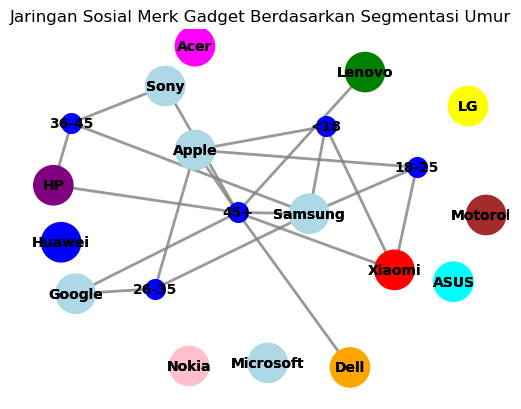

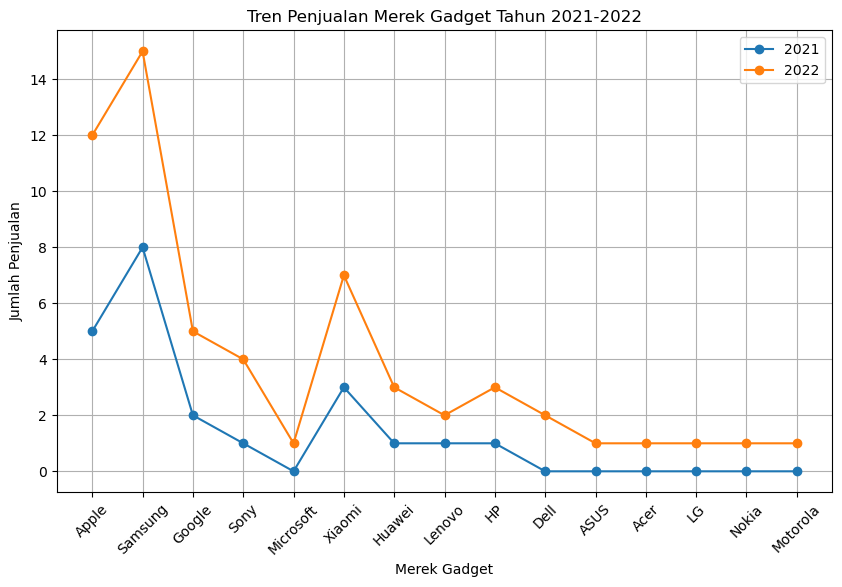

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Buat graf kosong
G = nx.Graph()

# Tambahkan simpul (node) segmentasi umur
age_segments = ["<18", "18-25", "26-35", "36-45", "45+"]

# Tambahkan simpul (node) merek gadget
gadget_brands = [
    "Apple", "Samsung", "Google", "Sony", "Microsoft",
    "Xiaomi", "Huawei", "Lenovo", "HP", "Dell",
    "ASUS", "Acer", "LG", "Nokia", "Motorola"
]

# Tambahkan tepi (edge) untuk menggambarkan hubungan antara segmentasi umur dan merek gadget
interactions = [
    ("<18", "Apple"), ("<18", "Samsung"), ("<18", "Xiaomi"),
    ("18-25", "Apple"), ("18-25", "Samsung"), ("18-25", "Xiaomi"),
    ("26-35", "Apple"), ("26-35", "Samsung"), ("26-35", "Google"),
    ("36-45", "Samsung"), ("36-45", "Sony"), ("36-45", "HP"),
    ("45+", "Apple"), ("45+", "Samsung"), ("45+", "Google"),
    ("45+", "Sony"), ("45+", "Xiaomi"), ("45+", "Lenovo"),
    ("45+", "HP"), ("45+", "Dell")
]

# Tambahkan simpul dan tepi ke dalam graf
G.add_nodes_from(age_segments, node_type="age_segment")
G.add_nodes_from(gadget_brands, node_type="gadget_brand")
G.add_edges_from(interactions)

# Visualisasikan jaringan sosial
pos = nx.spring_layout(G, k=1.5, seed=42)

# Atur warna berdasarkan merek gadget
brand_colors = {
    "Apple": "red",
    "Samsung": "blue",
    "Google": "green",
    "Sony": "purple",
    "Microsoft": "orange",
    "Xiaomi": "cyan",
    "Huawei": "magenta",
    "Lenovo": "yellow",
    "HP": "pink",
    "Dell": "brown",
    "ASUS": "lime",
    "Acer": "teal",
    "LG": "olive",
    "Nokia": "gold",
    "Motorola": "gray"
}

node_colors = []
for node, attr in G.nodes(data=True):
    if attr["node_type"] == "gadget_brand" and node in brand_colors:
        node_colors.append(brand_colors[node])
    else:
        node_colors.append("lightblue")

nx.draw_networkx_nodes(G, pos=pos, nodelist=gadget_brands, node_color=node_colors[:len(gadget_brands)], node_size=800)
nx.draw_networkx_nodes(G, pos=pos, nodelist=age_segments, node_color="blue", node_size=200)
nx.draw_networkx_edges(G, pos=pos, width=2, alpha=0.8, edge_color="gray")
nx.draw_networkx_labels(G, pos=pos, font_size=10, font_color="black", font_weight="bold")

# Atur label simpul berdasarkan merek gadget
brand_labels = {node: node for node, attr in G.nodes(data=True) if attr["node_type"] == "gadget_brand"}
nx.draw_networkx_labels(G, pos=pos, labels=brand_labels, font_size=10, font_color="black", font_weight="bold")

plt.axis("off")
plt.title("Jaringan Sosial Merk Gadget Berdasarkan Segmentasi Umur")
plt.show()


# Analisis tren penjualan
brands = list(brand_purchases.keys())
purchases_2021 = [brand_purchases[brand]["2021"] for brand in brands]
purchases_2022 = [brand_purchases[brand]["2022"] for brand in brands]

plt.figure(figsize=(10, 6))
plt.plot(brands, purchases_2021, marker="o", label="2021")
plt.plot(brands, purchases_2022, marker="o", label="2022")
plt.xlabel("Merek Gadget")
plt.ylabel("Jumlah Penjualan")
plt.title("Tren Penjualan Merek Gadget Tahun 2021-2022")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


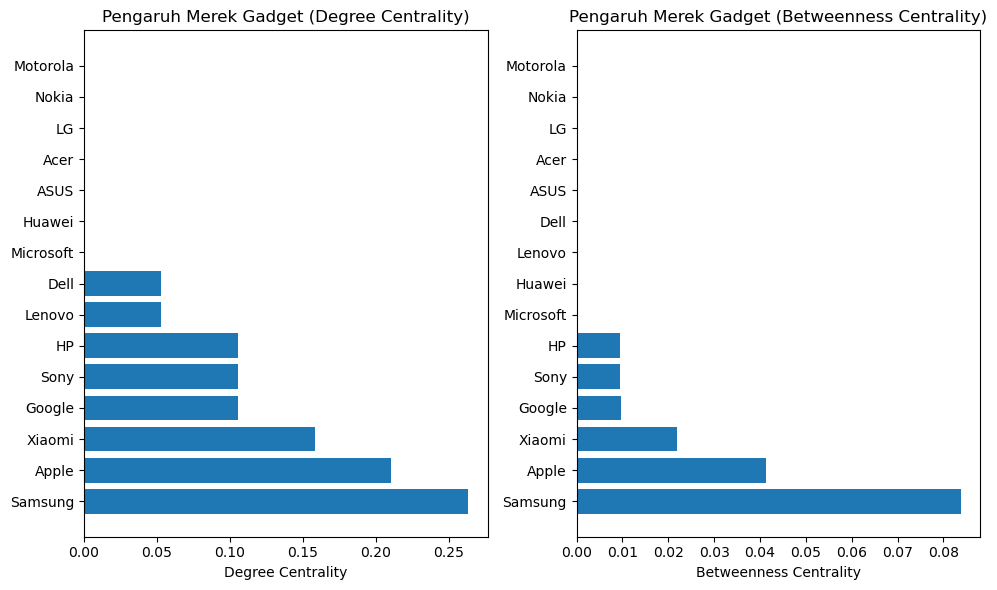

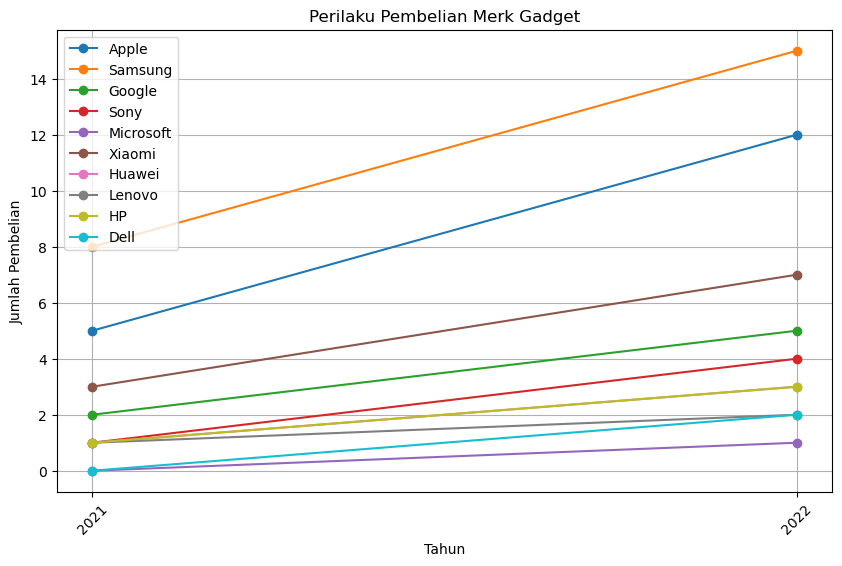

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Buat graf kosong
G = nx.Graph()

# Tambahkan simpul (node) segmentasi umur
age_segments = ["<18", "18-25", "26-35", "36-45", "45+"]

# Tambahkan simpul (node) merek gadget
gadget_brands = [
    "Apple", "Samsung", "Google", "Sony", "Microsoft",
    "Xiaomi", "Huawei", "Lenovo", "HP", "Dell",
    "ASUS", "Acer", "LG", "Nokia", "Motorola"
]

# Tambahkan tepi (edge) untuk menggambarkan hubungan antara segmentasi umur dan merek gadget
interactions = [
    ("<18", "Apple"), ("<18", "Samsung"), ("<18", "Xiaomi"),
    ("18-25", "Apple"), ("18-25", "Samsung"), ("18-25", "Xiaomi"),
    ("26-35", "Apple"), ("26-35", "Samsung"), ("26-35", "Google"),
    ("36-45", "Samsung"), ("36-45", "Sony"), ("36-45", "HP"),
    ("45+", "Apple"), ("45+", "Samsung"), ("45+", "Google"),
    ("45+", "Sony"), ("45+", "Xiaomi"), ("45+", "Lenovo"),
    ("45+", "HP"), ("45+", "Dell")
]

# Tambahkan simpul dan tepi ke dalam graf
G.add_nodes_from(age_segments, node_type="age_segment")
G.add_nodes_from(gadget_brands, node_type="gadget_brand")
G.add_edges_from(interactions)

# Analisis pengaruh merek gadget menggunakan degree centrality
degree_centrality = nx.degree_centrality(G)
brand_degree_centrality = {node: centrality for node, centrality in degree_centrality.items() if node in gadget_brands}
sorted_brands_degree = sorted(brand_degree_centrality.items(), key=lambda x: x[1], reverse=True)

# Analisis pengaruh merek gadget menggunakan betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
brand_betweenness_centrality = {node: centrality for node, centrality in betweenness_centrality.items() if node in gadget_brands}
sorted_brands_betweenness = sorted(brand_betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

# Analisis perilaku pembelian merk gadget
brand_purchases = {
    "Apple": {"2021": 5, "2022": 12},
    "Samsung": {"2021": 8, "2022": 15},
    "Google": {"2021": 2, "2022": 5},
    "Sony": {"2021": 1, "2022": 4},
    "Microsoft": {"2021": 0, "2022": 1},
    "Xiaomi": {"2021": 3, "2022": 7},
    "Huawei": {"2021": 1, "2022": 3},
    "Lenovo": {"2021": 1, "2022": 2},
    "HP": {"2021": 1, "2022": 3},
    "Dell": {"2021": 0, "2022": 2},
    "ASUS": {"2021": 0, "2022": 1},
    "Acer": {"2021": 0, "2022": 1},
    "LG": {"2021": 0, "2022": 1},
    "Nokia": {"2021": 0, "2022": 1},
    "Motorola": {"2021": 0, "2022": 1},
}

plt.figure(figsize=(10, 6))

# Visualisasi pengaruh merek gadget berdasarkan Degree Centrality
degree_labels = {brand: centrality for brand, centrality in sorted_brands_degree}
degree_values = [centrality for _, centrality in sorted_brands_degree]
plt.subplot(1, 2, 1)
plt.barh(range(len(degree_values)), degree_values, tick_label=list(degree_labels.keys()))
plt.xlabel("Degree Centrality")
plt.title("Pengaruh Merek Gadget (Degree Centrality)")

# Visualisasi pengaruh merek gadget berdasarkan Betweenness Centrality
betweenness_labels = {brand: centrality for brand, centrality in sorted_brands_betweenness}
betweenness_values = [centrality for _, centrality in sorted_brands_betweenness]
plt.subplot(1, 2, 2)
plt.barh(range(len(betweenness_values)), betweenness_values, tick_label=list(betweenness_labels.keys()))
plt.xlabel("Betweenness Centrality")
plt.title("Pengaruh Merek Gadget (Betweenness Centrality)")

plt.tight_layout()
plt.show()

# Visualisasi perilaku pembelian merk gadget
years = ["2021", "2022"]
purchases = {brand: [brand_purchases[brand][year] for year in years] for brand in gadget_brands}

plt.figure(figsize=(10, 6))
plt.plot(years, purchases["Apple"], marker="o", label="Apple")
plt.plot(years, purchases["Samsung"], marker="o", label="Samsung")
plt.plot(years, purchases["Google"], marker="o", label="Google")
plt.plot(years, purchases["Sony"], marker="o", label="Sony")
plt.plot(years, purchases["Microsoft"], marker="o", label="Microsoft")
plt.plot(years, purchases["Xiaomi"], marker="o", label="Xiaomi")
plt.plot(years, purchases["Huawei"], marker="o", label="Huawei")
plt.plot(years, purchases["Lenovo"], marker="o", label="Lenovo")
plt.plot(years, purchases["HP"], marker="o", label="HP")
plt.plot(years, purchases["Dell"], marker="o", label="Dell")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Pembelian")
plt.title("Perilaku Pembelian Merk Gadget")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Rekomendasi Strategi Pemasaran:
Merek: Google
Pertumbuhan Penjualan: 300.00%
Rekomendasi: Tingkatkan pemasaran untuk meningkatkan kesadaran merek dan menarik lebih banyak pelanggan.

Merek: Lenovo
Pertumbuhan Penjualan: 200.00%
Rekomendasi: Tingkatkan pemasaran untuk meningkatkan kesadaran merek dan menarik lebih banyak pelanggan.

Merek: Microsoft
Pertumbuhan Penjualan: 200.00%
Rekomendasi: Tingkatkan pemasaran untuk meningkatkan kesadaran merek dan menarik lebih banyak pelanggan.

Merek: Xiaomi
Pertumbuhan Penjualan: 150.00%
Rekomendasi: Tingkatkan pemasaran untuk meningkatkan kesadaran merek dan menarik lebih banyak pelanggan.

Merek: Samsung
Pertumbuhan Penjualan: 140.00%
Rekomendasi: Tingkatkan pemasaran untuk meningkatkan kesadaran merek dan menarik lebih banyak pelanggan.

Merek: HP
Pertumbuhan Penjualan: 133.33%
Rekomendasi: Tingkatkan pemasaran untuk meningkatkan kesadaran merek dan menarik lebih banyak pelanggan.

Merek: Dell
Pertumbuhan Penjualan: 100.00%
Rekomendasi: Tingka

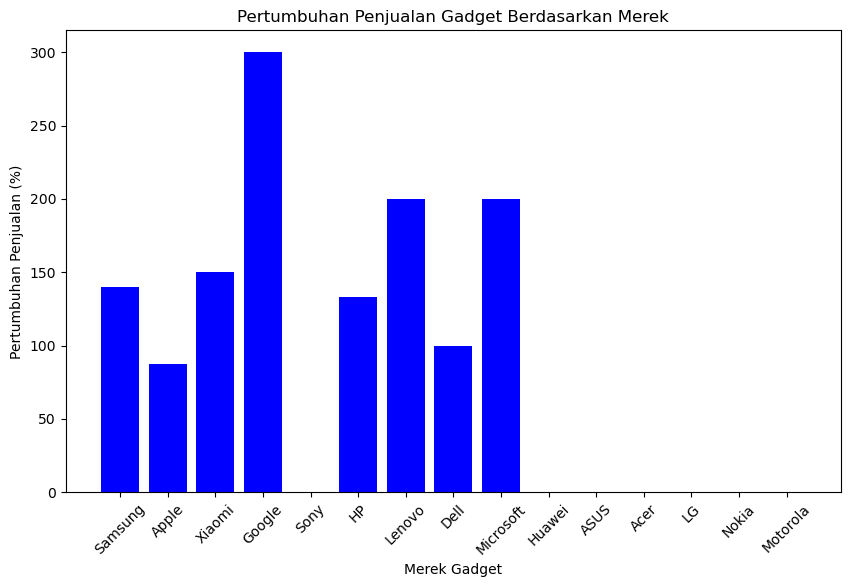

In [11]:
import matplotlib.pyplot as plt

# Analisis pertumbuhan penjualan
brands = ['Samsung', 'Apple', 'Xiaomi', 'Google', 'Sony', 'HP', 'Lenovo', 'Dell', 'Microsoft', 'Huawei', 'ASUS', 'Acer', 'LG', 'Nokia', 'Motorola']
growth_rates = []
for i in range(len(brands)):
    if purchases_2021[i] != 0:
        growth_rate = ((purchases_2022[i] - purchases_2021[i]) / purchases_2021[i]) * 100
        growth_rates.append(growth_rate)
    else:
        growth_rates.append(0)

# Menentukan merek dengan pertumbuhan penjualan tertinggi
highest_growth_brands = []
for i in range(len(brands)):
    if growth_rates[i] > 0:
        highest_growth_brands.append((brands[i], growth_rates[i]))

highest_growth_brands = sorted(highest_growth_brands, key=lambda x: x[1], reverse=True)

# Menampilkan merek dengan pertumbuhan penjualan tertinggi dan merekomendasikan peningkatan pemasaran
print("Rekomendasi Strategi Pemasaran:")
for brand, growth_rate in highest_growth_brands:
    print(f"Merek: {brand}")
    print(f"Pertumbuhan Penjualan: {growth_rate:.2f}%")
    print("Rekomendasi: Tingkatkan pemasaran untuk meningkatkan kesadaran merek dan menarik lebih banyak pelanggan.\n")

# Membuat plot untuk memvisualisasikan pertumbuhan penjualan
plt.figure(figsize=(10, 6))
plt.bar(brands, growth_rates, color=['blue' if brand in [item[0] for item in highest_growth_brands] else 'gray' for brand in brands])
plt.xlabel('Merek Gadget')
plt.ylabel('Pertumbuhan Penjualan (%)')
plt.title('Pertumbuhan Penjualan Gadget Berdasarkan Merek')
plt.xticks(rotation=45)
plt.show()
